# Decoding the Data Science Job Market: An Analytical Deep Dive into Salaries, Companies, and Hiring Patterns

# 1. Problem Statement

Salaries for data jobs vary a lot by company, industry, and location. It’s hard to know what actually drives pay. In this project, we’ll clean a real job-postings dataset and look for patterns. We’ll answer questions like: which sectors and states pay more, do higher-rated companies pay better, and does company size matter? We’ll test a few ideas with simple statistics, then build a small, interpretable model to predict whether a posting is high-pay or not.

# 2. Data Understanding & Cleaning

In [1]:
# Importing libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("DataScientist.csv")
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [3]:
# Check basic info
print("Shape (rows, columns):", df.shape)
display(df.head(5))
display(df.info())
display(df.isna().sum().sort_values(ascending=False).head(12))

Shape (rows, columns): (3909, 17)


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

None

Unnamed: 0           0
Size                 0
Competitors          0
Revenue              0
Sector               0
Industry             0
Type of ownership    0
Founded              0
Headquarters         0
index                0
Location             0
Company Name         0
dtype: int64

In [4]:
# Show data types and basic info
print("Dataset shape:", df.shape)
print("\nColumn data types:")
print(df.dtypes)

# Quick look at numeric columns
print("\nSummary stats for numeric columns:")
display(df.describe())

#Columns excluded because Job Description (too long) Competitors (very repetitive and sparse)
exclude_cols = ["Job Description", "Competitors"]

# Quick look at categorical columns (show top 10 unique values per column)
for col in df.columns:
    if df[col].dtype == "object" and col not in exclude_cols:
        print(f"\n--- {col} ---")
        print(f"Unique values: {df[col].nunique()}")
        print(df[col].value_counts(dropna=False).head(15))

Dataset shape: (3909, 17)

Column data types:
Unnamed: 0             int64
index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

Summary stats for numeric columns:


,Unnamed: 0,index,Rating,Founded
count,3909.000000,3909.000000,3909.000000,3909.000000
mean,1954.000000,2167.446662,3.283576,1479.154771
std,1128.575429,1247.657849,1.575749,855.750138
min,0.000000,0.000000,-1.000000,-1.000000
25%,977.000000,1121.000000,3.200000,1625.000000
50%,1954.000000,2161.000000,3.700000,1976.000000
75%,2931.000000,3249.000000,4.100000,2002.000000
max,3908.000000,4379.000000,5.000000,2020.000000



--- Job Title ---
Unique values: 2079
Job Title
Data Scientist                   274
Data Engineer                    260
Data Analyst                     246
Senior Data Scientist             91
Senior Data Analyst               47
Machine Learning Engineer         47
Big Data Engineer                 41
Business Intelligence Analyst     39
Senior Data Engineer              37
Sr. Data Scientist                23
Lead Data Scientist               23
Research Scientist                22
Data Modeler                      17
Junior Data Analyst               15
Principal Data Scientist          15
Name: count, dtype: int64

--- Salary Estimate ---
Unique values: 148
Salary Estimate
$93K-$151K (Glassdoor est.)     62
$113K-$180K (Glassdoor est.)    61
$71K-$122K (Glassdoor est.)     60
$111K-$175K (Glassdoor est.)    60
$119K-$147K (Glassdoor est.)    44
$100K-$172K (Glassdoor est.)    37
$97K-$159K (Glassdoor est.)     32
$60K-$124K (Glassdoor est.)     31
$12K-$111K (Glassdoor est.)   

In [5]:
# Drop structural index columns
df = df.drop(columns=["Unnamed: 0", "index"], errors="ignore")

In [6]:
# Clean Rating (-1 means missing)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df.loc[df["Rating"] < 0, "Rating"] = np.nan


In [7]:
# Clean Company Name (strip trailing rating/newlines)
df["Company Name"] = (
    df["Company Name"].astype(str).str.split("\n").str[0].str.strip()
)

In [8]:
# Split Location into City/State
df[["City", "State"]] = df["Location"].astype(str).str.split(",", n=1, expand=True)
df["City"] = df["City"].str.strip()
df["State"] = df["State"].str.strip()

In [9]:
# Clean Headquarters (-1 to NaN) and flag HQ vs Job location
df["Headquarters"] = df["Headquarters"].replace("-1", np.nan)
df["HQ_Differs_From_JobLoc"] = (df["Headquarters"] != df["Location"]).astype(int)


In [10]:
# Parse Salary Estimate → Min/Max/Avg (USD, K handled)
def _parse_salary(s):
    s = str(s).replace("Glassdoor est.", "").replace("$", "").replace(",", "").strip()
    s = s.replace("K", "000").replace("k", "000")
    nums = re.findall(r"\d+", s)
    if len(nums) >= 2:
        lo, hi = int(nums[0]), int(nums[1])
    elif len(nums) == 1:
        lo = hi = int(nums[0])
    else:
        return pd.Series([np.nan, np.nan, np.nan])
    return pd.Series([lo, hi, (lo + hi) / 2])

df[["Min_Salary", "Max_Salary", "Avg_Salary"]] = df["Salary Estimate"].apply(_parse_salary)


In [11]:
# Simplify Job Title into role buckets
def _role_map(t):
    t = str(t).lower()
    if "machine learning" in t:
        return "ML Engineer"
    if "data engineer" in t or "big data engineer" in t:
        return "Data Engineer"
    if "business intelligence" in t or "bi analyst" in t:
        return "BI Analyst"
    if "analyst" in t:
        return "Data Analyst"
    if "scientist" in t or "research scientist" in t:
        return "Data Scientist"
    return "Other"
df["Role_Simple"] = df["Job Title"].apply(_role_map)


In [12]:
# Convert Size to midpoint and bucket
def _size_midpoint(s):
    s = str(s)
    if s == "-1" or s.lower() == "unknown":
        return np.nan
    m = re.findall(r"(\d+)\s*to\s*(\d+)", s)
    if m:
        lo, hi = map(int, m[0]); return (lo + hi) / 2
    m2 = re.findall(r"(\d+)\s*\+", s)
    if m2:
        return float(m2[0])
    return np.nan

df["Size_Midpoint"] = df["Size"].apply(_size_midpoint)

def _size_bucket(v):
    if pd.isna(v): return "Unknown"
    if v < 100: return "Small"
    if v < 1000: return "Medium"
    if v < 5000: return "Large"
    if v < 10000: return "Very Large"
    return "Enterprise"

df["Size_Bucket"] = df["Size_Midpoint"].apply(_size_bucket)


In [13]:
# Derive Company Age from Founded
df["Founded"] = pd.to_numeric(df["Founded"], errors="coerce")
df.loc[df["Founded"] <= 0, "Founded"] = np.nan
df.loc[df["Founded"] > 2025, "Founded"] = np.nan
df["Company_Age"] = 2025 - df["Founded"]


In [14]:
# Clean Type of ownership (-1 → Unknown)
df["Type of ownership"] = df["Type of ownership"].replace("-1", "Unknown")


In [15]:
# Clean Industry and Sector (-1 → Unknown)
df["Industry"] = df["Industry"].replace("-1", "Unknown")
df["Sector"]   = df["Sector"].replace("-1", "Unknown")


In [16]:
# Map Revenue to ordered buckets and numeric midpoint (USD)
def _rev_bucket(s):
    s = str(s)
    if s in ["-1", "Unknown / Non-Applicable", "Unknown"]:
        return "Unknown"
    if "Less than $1 million" in s: return "<$1M"
    if "$1 to $5 million" in s: return "$1M–$5M"
    if "$5 to $10 million" in s: return "$5M–$10M"
    if "$10 to $25 million" in s: return "$10M–$25M"
    if "$25 to $50 million" in s: return "$25M–$50M"
    if "$50 to $100 million" in s: return "$50M–$100M"
    if "$100 to $500 million" in s: return "$100M–$500M"
    if "$500 million to $1 billion" in s: return "$500M–$1B"
    if "$1 to $2 billion" in s: return "$1B–$2B"
    if "$2 to $5 billion" in s: return "$2B–$5B"
    if "$5 to $10 billion" in s: return "$5B–$10B"
    if "$10+ billion" in s: return "$10B+"
    return "Other"

def _rev_midpoint(s):
    s = str(s).lower()
    if s in ["-1", "unknown / non-applicable", "unknown"]:
        return np.nan
    vals = re.findall(r"\$?([\d\.]+)", s)
    scale = 1.0
    if "billion" in s: scale = 1e9
    elif "million" in s: scale = 1e6
    if len(vals) >= 2:
        lo, hi = float(vals[0])*scale, float(vals[1])*scale
        return (lo + hi) / 2
    if len(vals) == 1:
        return float(vals[0]) * scale
    return np.nan

df["Revenue_Bucket"]   = df["Revenue"].apply(_rev_bucket)
df["Revenue_Midpoint"] = df["Revenue"].apply(_rev_midpoint)


In [17]:
# Convert Competitors to a simple flag
df["Has_Competitor"] = (~df["Competitors"].isin(["-1"]) & df["Competitors"].notna()).astype(int)


In [18]:
# Convert Easy Apply to binary flag
df["Easy_Apply_Flag"] = df["Easy Apply"].astype(str).str.lower().isin(["true", "yes", "y", "1"]).astype(int)


In [19]:
# Final quick preview of new fields
preview_cols = [
    "Job Title","Role_Simple","Salary Estimate","Min_Salary","Max_Salary","Avg_Salary",
    "Company Name","Location","City","State","Headquarters","HQ_Differs_From_JobLoc",
    "Size","Size_Midpoint","Size_Bucket","Founded","Company_Age",
    "Type of ownership","Industry","Sector","Revenue","Revenue_Bucket","Revenue_Midpoint",
    "Has_Competitor","Easy_Apply_Flag","Rating"
]
display(df[preview_cols].head(5))


,Job Title,Role_Simple,Salary Estimate,Min_Salary,Max_Salary,Avg_Salary,Company Name,Location,City,State,...,Company_Age,Type of ownership,Industry,Sector,Revenue,Revenue_Bucket,Revenue_Midpoint,Has_Competitor,Easy_Apply_Flag,Rating
0,Senior Data Scientist,Data Scientist,$111K-$181K (Glassdoor est.),111000.0,181000.0,146000.0,Hopper,"New York, NY",New York,NY,...,18.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,Unknown,NaN,0,0,3.5
1,"Data Scientist, Product Analytics",Data Scientist,$111K-$181K (Glassdoor est.),111000.0,181000.0,146000.0,Noom US,"New York, NY",New York,NY,...,17.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,Unknown,NaN,0,0,4.5
2,Data Science Manager,Other,$111K-$181K (Glassdoor est.),111000.0,181000.0,146000.0,Decode_M,"New York, NY",New York,NY,...,NaN,Unknown,Unknown,Unknown,Unknown / Non-Applicable,Unknown,NaN,0,1,NaN
3,Data Analyst,Data Analyst,$111K-$181K (Glassdoor est.),111000.0,181000.0,146000.0,Sapphire Digital,"Lyndhurst, NJ",Lyndhurst,NJ,...,6.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,Unknown,NaN,1,0,3.4
4,"Director, Data Science",Other,$111K-$181K (Glassdoor est.),111000.0,181000.0,146000.0,United Entertainment Group,"New York, NY",New York,NY,...,18.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Unknown,NaN,1,0,3.4


In [20]:
# Check missing values after cleaning
df.isna().sum().sort_values(ascending=False)


Revenue_Midpoint          1392
Company_Age                977
Founded                    977
Rating                     409
Size_Midpoint              306
Headquarters               240
Job Title                    0
State                        0
Has_Competitor               0
Revenue_Bucket               0
Size_Bucket                  0
Role_Simple                  0
Avg_Salary                   0
Max_Salary                   0
Min_Salary                   0
HQ_Differs_From_JobLoc       0
Easy Apply                   0
City                         0
Salary Estimate              0
Competitors                  0
Revenue                      0
Sector                       0
Industry                     0
Type of ownership            0
Size                         0
Location                     0
Company Name                 0
Job Description              0
Easy_Apply_Flag              0
dtype: int64

In [21]:
# Impute Rating with sector median, then global median
df["Rating_filled"] = df["Rating"]
df["Rating_filled"] = df.groupby("Sector")["Rating_filled"].transform(lambda s: s.fillna(s.median()))
df["Rating_filled"] = df["Rating_filled"].fillna(df["Rating_filled"].median())


In [22]:
# Impute Company_Age with sector median, then global median
df["Company_Age_filled"] = df["Company_Age"]
df["Company_Age_filled"] = df.groupby("Sector")["Company_Age_filled"].transform(lambda s: s.fillna(s.median()))
df["Company_Age_filled"] = df["Company_Age_filled"].fillna(df["Company_Age_filled"].median())


Revenue_Midpoint (1392 missing): we’ll keep “Unknown” as its own group; missing revenue is an actual business insight (many companies don’t report it).

Size_Midpoint (306 missing): again, these are “Unknown / -1”, so leaving them as NaN is valid.

Headquarters (240 missing): not critical, especially since we already captured HQ_Differs_From_JobLoc.

Company_Age & Founded (977 missing): we already filled Company_Age_filled, so we’ll use that version later and can safely ignore the original.

In [23]:
salary_median = df["Avg_Salary"].median()
df["Is_High_Salary"] = (df["Avg_Salary"] > salary_median).astype(int)

We created High_Pay as a simple binary target variable for the predictive modeling section we’ll do later. It divides jobs into:

1 - High-paying job

0 - Lower-paying job

We based it on whether a job’s average salary (Avg_Salary) is above the median salary in the dataset.

In [24]:
# Final sanity check on prepared columns for EDA/ML
eda_cols = [
    "Avg_Salary","Is_High_Salary","Role_Simple","Rating_filled","Company_Age_filled",
    "Size_Bucket","Revenue_Bucket","Type of ownership","Sector",
    "State","Easy_Apply_Flag","Has_Competitor"
]
df[eda_cols].info()
df[eda_cols].isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Avg_Salary          3909 non-null   float64
 1   Is_High_Salary      3909 non-null   int64  
 2   Role_Simple         3909 non-null   object 
 3   Rating_filled       3909 non-null   float64
 4   Company_Age_filled  3909 non-null   float64
 5   Size_Bucket         3909 non-null   object 
 6   Revenue_Bucket      3909 non-null   object 
 7   Type of ownership   3909 non-null   object 
 8   Sector              3909 non-null   object 
 9   State               3909 non-null   object 
 10  Easy_Apply_Flag     3909 non-null   int64  
 11  Has_Competitor      3909 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 366.6+ KB


Avg_Salary            0
Is_High_Salary        0
Role_Simple           0
Rating_filled         0
Company_Age_filled    0
Size_Bucket           0
Revenue_Bucket        0
Type of ownership     0
Sector                0
State                 0
Easy_Apply_Flag       0
Has_Competitor        0
dtype: int64

In [25]:
keep_cols = [
    "Company Name", "Role_Simple", "State",
    "Min_Salary", "Max_Salary", "Avg_Salary", "Is_High_Salary",
    "Rating_filled", "Company_Age_filled",
    "Size_Bucket", "Revenue_Bucket",
    "Type of ownership", "Sector",
    "Easy_Apply_Flag", "Has_Competitor",
    "HQ_Differs_From_JobLoc" ]

df_final = df[keep_cols].copy()

print("Final dataset ready.")
print("Shape:", df_final.shape)
print("\nColumns included:\n", df_final.columns.tolist())

# Quick health check
df_final.info()

Final dataset ready.
Shape: (3909, 16)

Columns included:
 ['Company Name', 'Role_Simple', 'State', 'Min_Salary', 'Max_Salary', 'Avg_Salary', 'Is_High_Salary', 'Rating_filled', 'Company_Age_filled', 'Size_Bucket', 'Revenue_Bucket', 'Type of ownership', 'Sector', 'Easy_Apply_Flag', 'Has_Competitor', 'HQ_Differs_From_JobLoc']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company Name            3909 non-null   object 
 1   Role_Simple             3909 non-null   object 
 2   State                   3909 non-null   object 
 3   Min_Salary              3909 non-null   float64
 4   Max_Salary              3909 non-null   float64
 5   Avg_Salary              3909 non-null   float64
 6   Is_High_Salary          3909 non-null   int64  
 7   Rating_filled           3909 non-null   float64
 8   Company_Age_filled      3909 non

In [26]:
df_final.head()

,Company Name,Role_Simple,State,Min_Salary,Max_Salary,Avg_Salary,Is_High_Salary,Rating_filled,Company_Age_filled,Size_Bucket,Revenue_Bucket,Type of ownership,Sector,Easy_Apply_Flag,Has_Competitor,HQ_Differs_From_JobLoc
0,Hopper,Data Scientist,NY,111000.0,181000.0,146000.0,1,3.50,18.0,Medium,Unknown,Company - Private,Travel & Tourism,0,0,1
1,Noom US,Data Scientist,NY,111000.0,181000.0,146000.0,1,4.50,17.0,Large,Unknown,Company - Private,Consumer Services,0,0,0
2,Decode_M,Other,NY,111000.0,181000.0,146000.0,1,3.85,35.0,Small,Unknown,Unknown,Unknown,1,0,0
3,Sapphire Digital,Data Analyst,NJ,111000.0,181000.0,146000.0,1,3.40,6.0,Medium,Unknown,Company - Private,Information Technology,0,1,0
4,United Entertainment Group,Other,NY,111000.0,181000.0,146000.0,1,3.40,18.0,Medium,Unknown,Company - Private,Business Services,0,1,0


# 3. Exploratory Data Analysis

### 3.1 Industry Distribution

In [27]:
import plotly.express as px

# Prepare the data
top_sectors = df_final["Sector"].value_counts().head(10).reset_index()
top_sectors.columns = ["Sector", "Count"]

# Sunburst chart
fig = px.sunburst(
    top_sectors,
    path=["Sector"],
    values="Count",
    color="Count",
    color_continuous_scale="Oranges",
    title="Top Hiring Sectors"
)

fig.update_layout(
    width=700,
    height=700
)

fig.show()


The job market is dominated by two sectors: Information Technology and Business Services, which together make up the majority of postings. IT leads by a large margin, showing that most data-related roles are concentrated in tech-driven companies. A noticeable share of roles are also categorized as “Unknown,” which likely reflects incomplete listings but still signals a wide range of employers. Beyond these, sectors like Biotech & Pharmaceuticals, Finance, and Health Care contribute smaller volumes, while traditional sectors such as Government and Manufacturing appear less frequently. Overall, data talent is clearly in highest demand in tech-centric and service-oriented industries.

### 3.2 Company Size Distribution

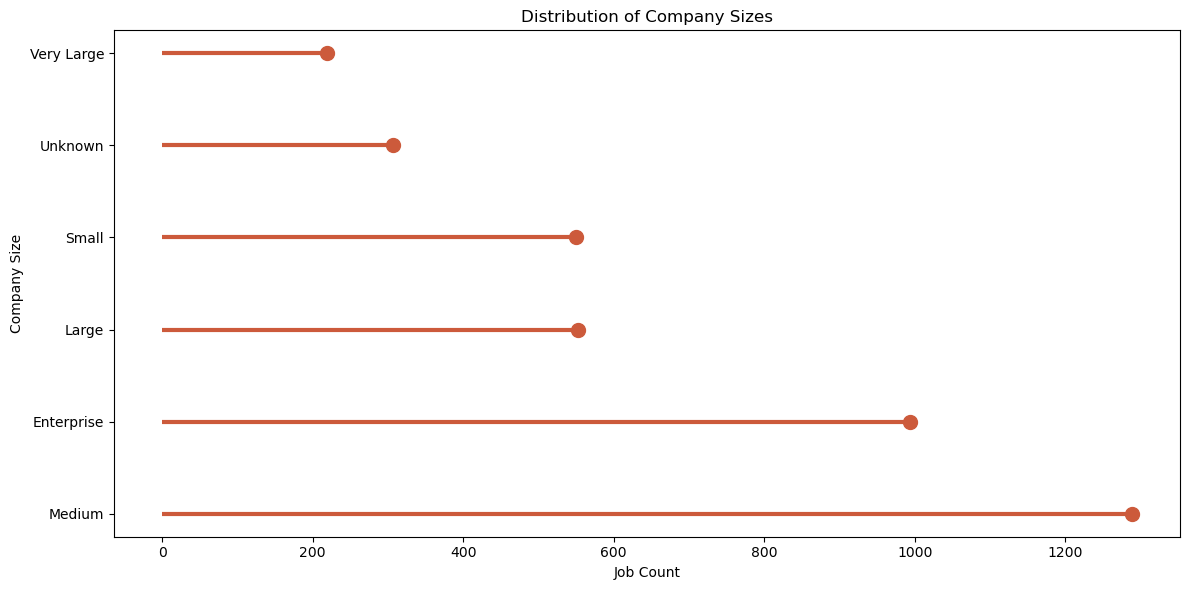

In [28]:
# Lollipop chart for company size distribution

size_counts = df_final["Size_Bucket"].value_counts()

plt.figure(figsize=(12,6))

plt.hlines(
    y=size_counts.index,
    xmin=0, xmax=size_counts.values,
    color="#cc5a3b",
    linewidth=3
)

plt.plot(
    size_counts.values,
    size_counts.index,
    "o",
    color="#cc5a3b",
    markersize=10
)

plt.title("Distribution of Company Sizes")
plt.xlabel("Job Count")
plt.ylabel("Company Size")
plt.tight_layout()
plt.show()


Most job postings come from medium-sized and enterprise-level companies, which together account for the bulk of hiring. Smaller companies and startups contribute fewer roles, and only a small share of postings come from very large corporations. The noticeable "Unknown" segment reflects incomplete listings but doesn’t change the broader pattern: the data science job market is driven mainly by established mid-sized companies and large enterprises rather than tiny startups or massive legacy firms.

### 3.3 Role Distribution

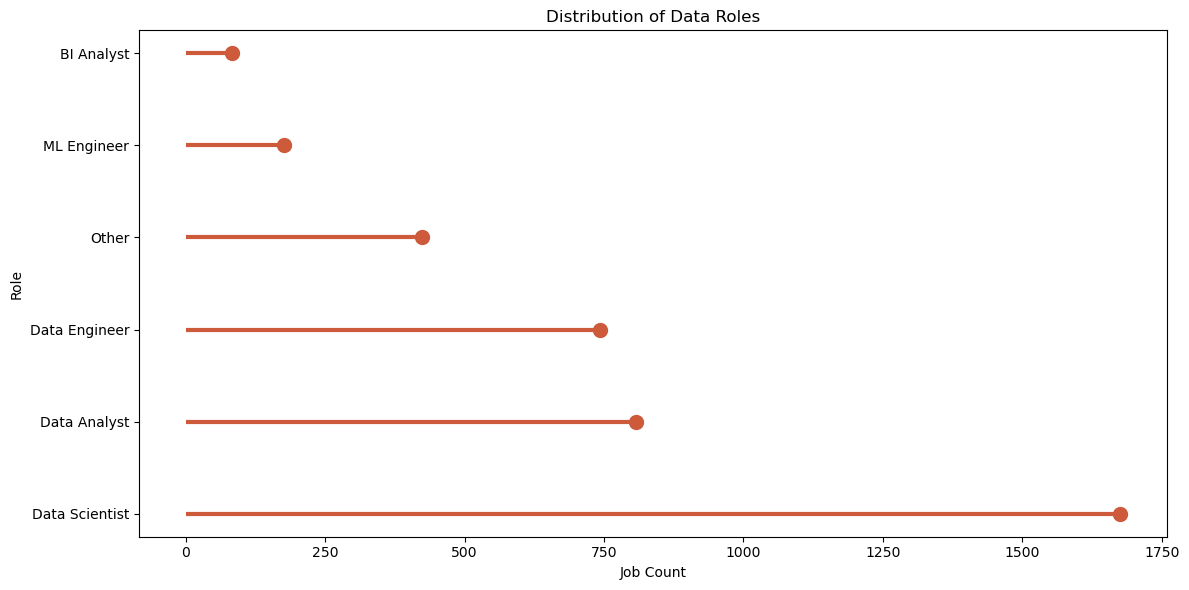

In [29]:
# Plot role distribution using a lollipop chart

role_counts = df_final["Role_Simple"].value_counts()

plt.figure(figsize=(12,6))

# Lines
plt.hlines(
    y=role_counts.index,
    xmin=0, xmax=role_counts.values,
    color="#cc5a3b",
    linewidth=3
)

# Dots
plt.plot(
    role_counts.values,
    role_counts.index,
    "o",
    color="#cc5a3b",
    markersize=10
)

plt.title("Distribution of Data Roles")
plt.xlabel("Job Count")
plt.ylabel("Role")
plt.tight_layout()
plt.show()


Data Scientist roles dominate the dataset by a wide margin, followed by Data Analyst and Data Engineer positions. ML Engineer and BI Analyst roles appear far less frequently, showing they are more niche compared to the core data roles. This distribution suggests that most companies are hiring for broad analytical and modeling capabilities rather than highly specialized positions.

### 3.4 Salary Landscape

C:\Users\rgane\AppData\Local\Temp\ipykernel_40252\1704290234.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



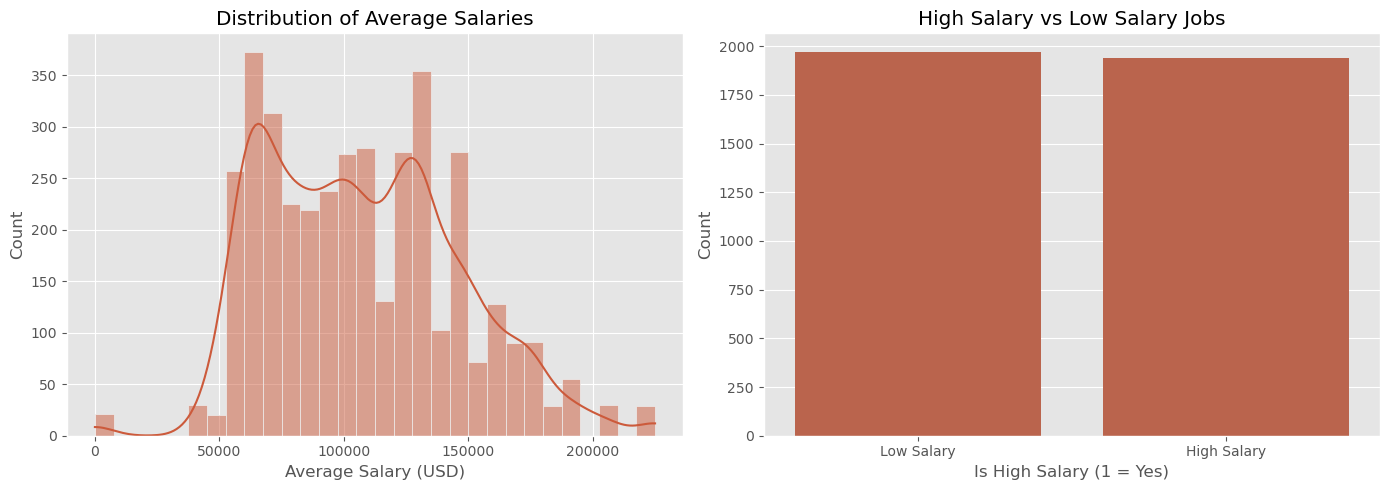

In [30]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Salary Distribution (orange)
sns.histplot(
    df_final["Avg_Salary"],
    bins=30,
    kde=True,
    ax=ax[0],
    color="#cc5a3b"
)
ax[0].set_title("Distribution of Average Salaries")
ax[0].set_xlabel("Average Salary (USD)")
ax[0].set_ylabel("Count")

# High vs Low Salary Count (orange)
sns.countplot(
    x=df_final["Is_High_Salary"],
    ax=ax[1],
    color="#cc5a3b"
)
ax[1].set_title("High Salary vs Low Salary Jobs")
ax[1].set_xlabel("Is High Salary (1 = Yes)")
ax[1].set_ylabel("Count")
ax[1].set_xticklabels(["Low Salary", "High Salary"])

plt.tight_layout()
plt.show()


The salary distribution shows that most data jobs fall between roughly 70K and 140K, with a long tail of higher-paying roles stretching past 200K. It’s not a perfect bell curve — the right side is heavier, meaning a good number of roles pay well above the median.

The split between high-salary and low-salary jobs is almost even, which makes sense because our high-salary definition is based on the median. This balanced split is useful later when we build the prediction model, since the target won’t be biased toward one class.

### 3.5 Salary by Role

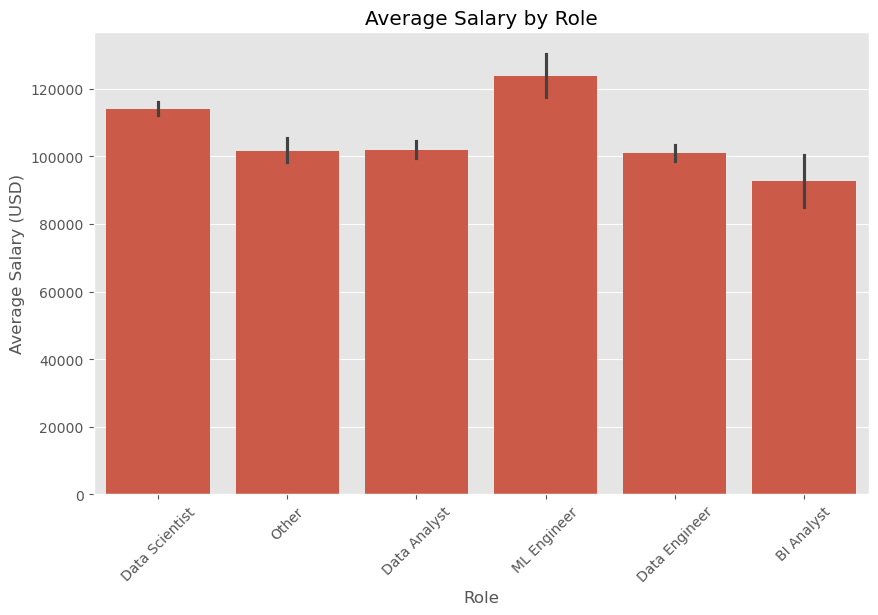

In [31]:
# plot average salary across different roles

plt.figure(figsize=(10,6))
sns.barplot(data=df_final, x="Role_Simple", y="Avg_Salary", estimator="mean")
plt.title("Average Salary by Role")
plt.xlabel("Role")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.show()


Machine Learning Engineers stand out as the highest-paid group, earning noticeably more than all other roles. Data Scientists follow behind with strong salaries, while Data Analysts and BI Analysts sit at the lower end of the pay range. Data Engineers and roles grouped as “Other” fall somewhere in the middle. Overall, the chart shows a clear hierarchy, with more specialized and technical roles offering the biggest paychecks./

### 3.6 Average Salary by State

In [32]:
# compute average salary per state
state_salary = (
    df_final.groupby("State", as_index=False)["Avg_Salary"]
    .mean()
)

import plotly.express as px

fig = px.choropleth(
    state_salary,
    locations="State",
    locationmode="USA-states",
    color="Avg_Salary",
    color_continuous_scale=["#fee5d9", "#fcae91", "#fb6a4a", "#cb181d"],
    scope="usa",
    title="Average Salary by State (USA)",
)

# increase map size
fig.update_layout(
    width=900,
    height=600,
    margin=dict(l=50, r=50, t=70, b=50)
)

fig.show()


The salary landscape isn’t evenly distributed. California and New York clearly dominate, offering the strongest compensation for data roles, especially in tech-dense and finance-heavy regions. States like Texas and Illinois sit in a solid middle tier with competitive pay, while other states in the dataset cluster toward lower averages. The pattern reflects well-known industry hubs: higher salaries tend to appear where major tech companies, financial institutions, and data teams are concentrated. This regional imbalance hints at both opportunity hotspots and cost-of-living trade-offs, setting the stage for deeper analysis in later sections.

### 3.7 Salary vs Company Rating.

C:\Users\rgane\AppData\Local\Temp\ipykernel_40252\1508132211.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




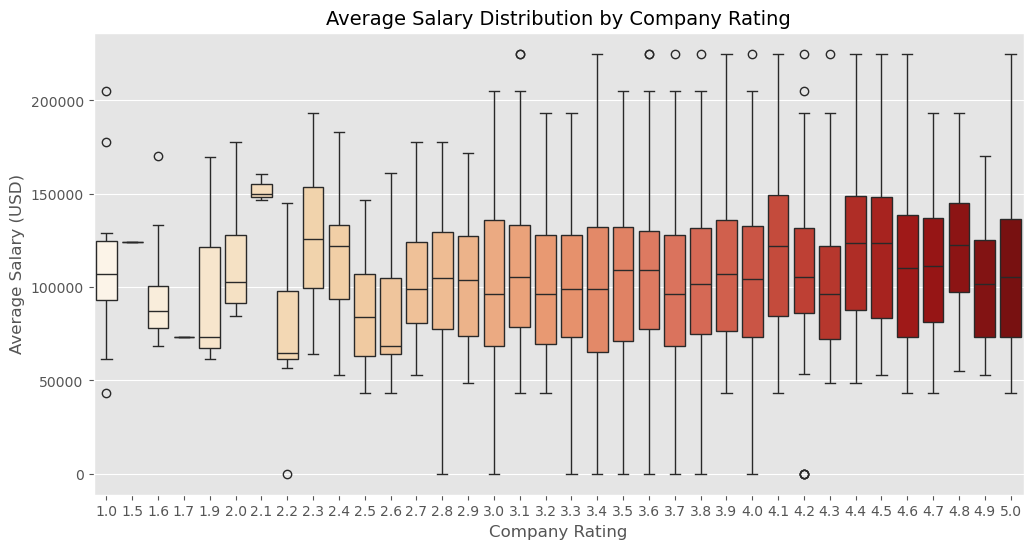

In [33]:
# Bin ratings to nearest half-star for cleaner grouping
df_final['Rating_Bin'] = df_final['Rating_filled'].round(1)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_final,
    x='Rating_Bin',
    y='Avg_Salary',
    palette='OrRd'
)

plt.title("Average Salary Distribution by Company Rating", fontsize=14)
plt.xlabel("Company Rating", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.show()


The boxplot shows that salaries tend to rise as company ratings go up. Higher-rated companies usually offer higher median pay and have a tighter, more stable salary range. Lower-rated companies have a wider spread, meaning pay is more unpredictable. So, while rating isn’t the only factor that matters, jobs at well-rated companies generally pay better and more consistently.

### 3.8 Does Company Age Influence Salary?

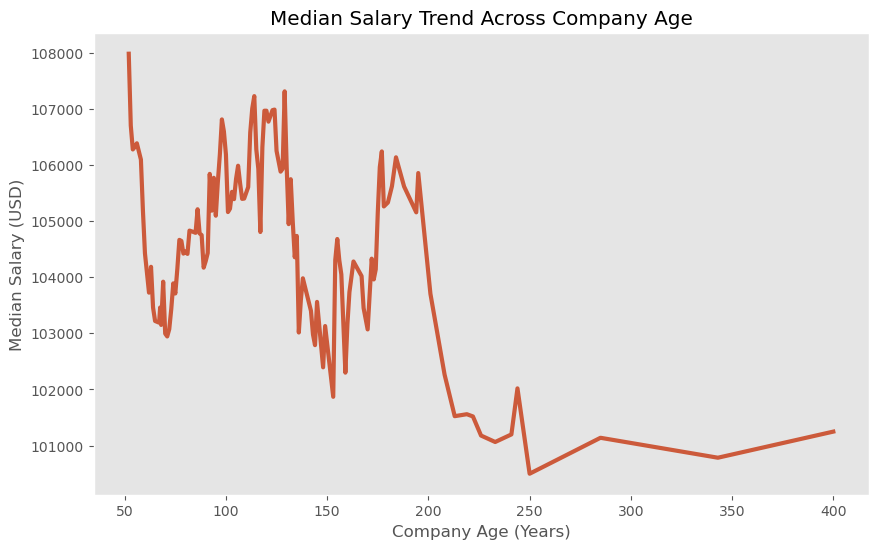

In [34]:
# Group by age and compute median salary
age_salary = df_final.groupby("Company_Age_filled")["Avg_Salary"].median().reset_index()

# Smooth the line using rolling window
age_salary["Smoothed"] = age_salary["Avg_Salary"].rolling(50).mean()

plt.figure(figsize=(10,6))
plt.plot(age_salary["Company_Age_filled"], age_salary["Smoothed"], 
         color="#cc5a3b", linewidth=3)

plt.title("Median Salary Trend Across Company Age")
plt.xlabel("Company Age (Years)")
plt.ylabel("Median Salary (USD)")
plt.grid(False)
plt.show()


The smoothed trend stays almost flat across most age ranges, which means company age has very little impact on how much a data role pays.
Young companies, mid-age companies, and even very old firms all offer salaries within a similar band.
This suggests salary differences are shaped more by role type, industry, and location rather than how long a company has been around.


### 3.9 Salary by Sector

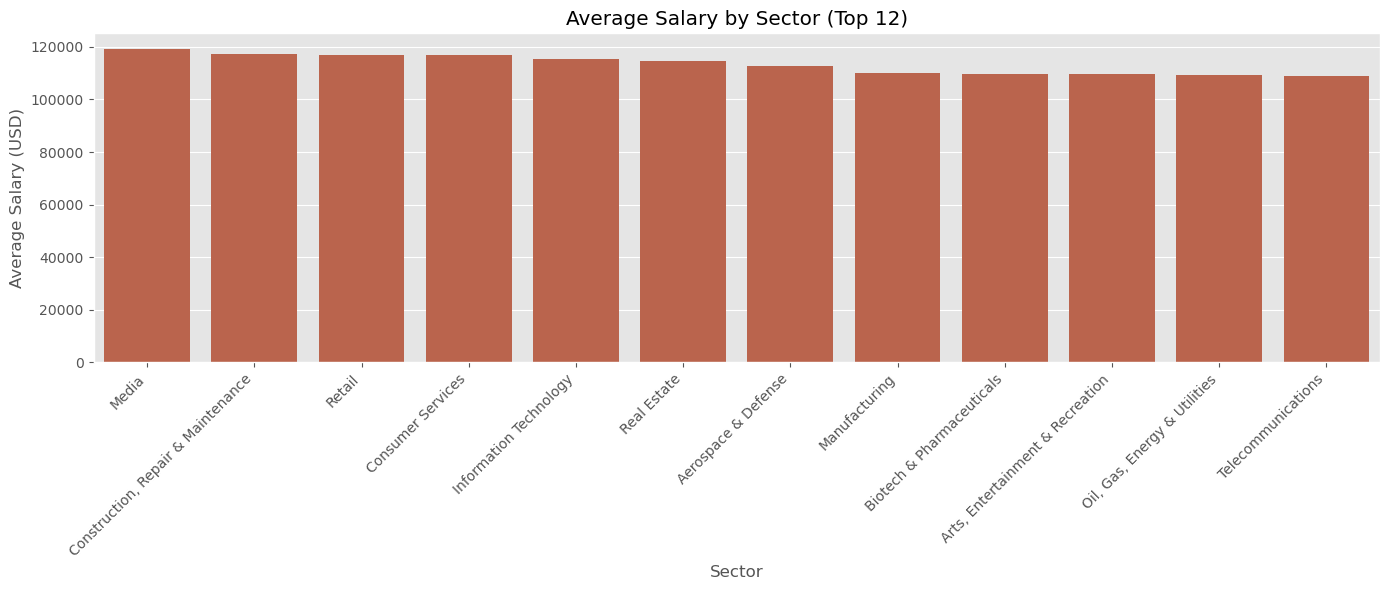

In [35]:
# Calculate average salary per sector
sector_salary = (
    df_final.groupby("Sector", as_index=False)["Avg_Salary"]
    .mean()
    .sort_values(by="Avg_Salary", ascending=False)
    .head(12)   # top 12 sectors
)

plt.figure(figsize=(14,6))

# Single-color vertical bars
sns.barplot(
    data=sector_salary,
    x="Sector",
    y="Avg_Salary",
    color="#cc5a3b"
)

plt.title("Average Salary by Sector (Top 12)")
plt.xlabel("Sector")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Salaries are fairly consistent across the top sectors, with only small differences between them. Media, Construction, Retail, IT, and Consumer Services all offer similar average pay levels, suggesting that compensation for data roles is not heavily driven by sector alone. Even industries like Biotech, Manufacturing, and Energy sit in roughly the same range. Overall, sector does not appear to be a strong predictor of salary in this dataset.

### 3.10 Salary by Company Size

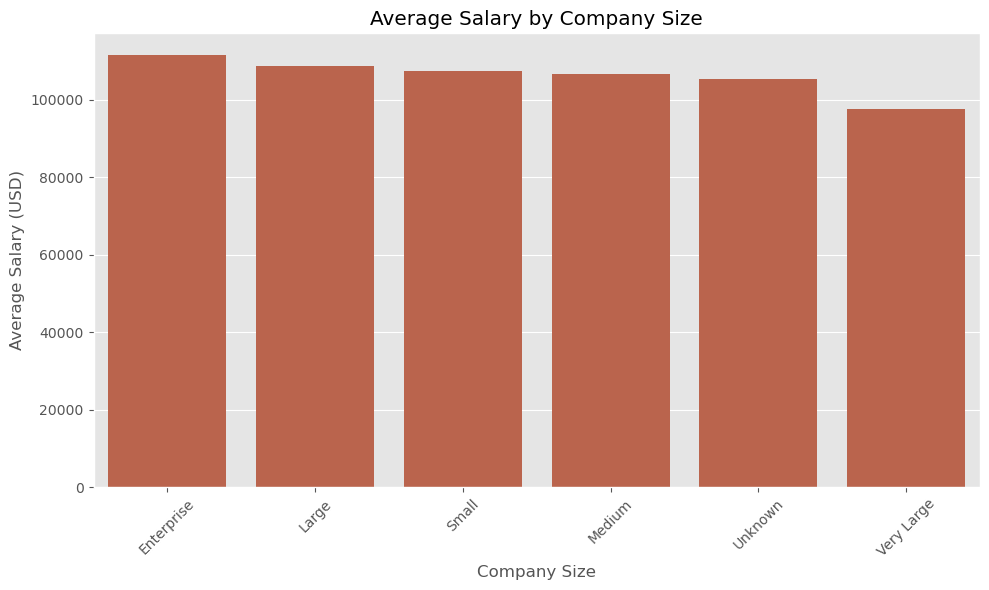

In [36]:
# Calculate average salary per company size
size_salary = (
    df_final.groupby("Size_Bucket", as_index=False)["Avg_Salary"]
    .mean()
    .sort_values(by="Avg_Salary", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=size_salary,
    x="Size_Bucket",
    y="Avg_Salary",
    color="#cc5a3b"
)

plt.title("Average Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Enterprise and large companies offer the highest average salaries, but the overall differences across size categories are not dramatic. Medium and small companies pay slightly less on average, yet still remain in a similar range. Very large corporations show the lowest average salary among the defined categories, likely due to more junior or lower-paying roles included in their listings. Overall, company size influences salary, but not as strongly as role, location, or industry.

### 3.11 Salary vs Easy Apply

C:\Users\rgane\AppData\Local\Temp\ipykernel_40252\486151163.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




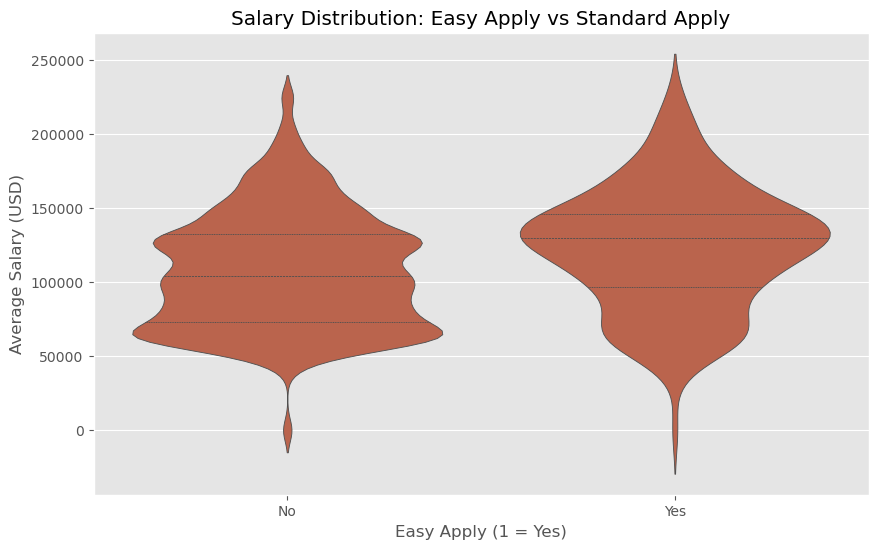

In [37]:
plt.figure(figsize=(10,6))

sns.violinplot(
    data=df_final,
    x="Easy_Apply_Flag",
    y="Avg_Salary",
    palette=["#cc5a3b", "#cc5a3b"],
    inner="quartile"
)

plt.title("Salary Distribution: Easy Apply vs Standard Apply")
plt.xlabel("Easy Apply (1 = Yes)")
plt.ylabel("Average Salary (USD)")
plt.xticks([0,1], ["No", "Yes"])
plt.show()


The salary distribution for standard applications is noticeably wider and stretches higher than for Easy Apply roles. While both categories share similar mid-range salaries, the highest-paying positions appear far more often in the non–Easy Apply group. This suggests that companies offering Easy Apply tend to post more accessible or junior-level roles, while higher-paying jobs usually require a more involved application process.

# 4. Statistical Analysis (Inferential Testing)

### 4.1 Statistical Test — Salary Differences Across Roles (ANOVA)

Hypothesis

H0: All roles have the same average salary

H1: At least one role has a significantly different salary

In [38]:
from scipy.stats import f_oneway

# group salaries by role
groups = [
    df_final[df_final["Role_Simple"] == role]["Avg_Salary"]
    for role in df_final["Role_Simple"].unique()
]

# run ANOVA
f_stat, p_val = f_oneway(*groups)

print("ANOVA Results for Salary Differences Across Roles")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.5f}")


ANOVA Results for Salary Differences Across Roles
F-statistic: 28.478
P-value: 0.00000


The ANOVA test returned a very small p-value (< 0.00001), which means the differences in salary across roles are statistically significant.

In simple terms: Not all roles are paid the same. Some roles consistently earn more than others, and this difference is real — not random chance. This matches what we saw earlier in the EDA: Machine Learning Engineers and Data Scientists earn more on average, while BI Analysts and Data Analysts earn less. ANOVA basically confirms that this pattern is meaningful and backed by data, not just visual noise.


### 4.2 Independent t-Test — Salary vs Easy Apply

Hypothesis

H0: There is no difference in salary between Easy-Apply jobs and normal jobs

H1: There is a difference in salary between the two groups

In [39]:
from scipy.stats import ttest_ind

# split salaries into two groups
easy = df_final[df_final["Easy_Apply_Flag"] == 1]["Avg_Salary"]
normal = df_final[df_final["Easy_Apply_Flag"] == 0]["Avg_Salary"]

# run t-test
t_stat, p_val = ttest_ind(easy, normal, equal_var=False)  # Welch's t-test

print("T-Test Results: Easy Apply vs Standard Apply Salaries")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")
print("Easy Apply Mean Salary:", round(easy.mean(), 2))
print("Standard Apply Mean Salary:", round(normal.mean(), 2))


T-Test Results: Easy Apply vs Standard Apply Salaries
T-statistic: 4.863
P-value: 0.00000
Easy Apply Mean Salary: 122859.89
Standard Apply Mean Salary: 107051.02


The t-test shows a very small p-value (< 0.00001), which means the salary gap between Easy-Apply roles and standard application roles is statistically significant.

In plain English: Easy-Apply jobs actually pay more — and the difference isn’t random. 
1. Easy Apply Avg Salary: ~$122.9K
   
2. Standard Apply Avg Salary: ~$107.0K

So despite the common belief that Easy-Apply roles are “lower quality,” the data shows the opposite: Companies using Easy Apply tend to offer higher-paying roles, likely because they’re competing harder for talent.

### 4.3 Pearson Correlation — Company Rating vs Salary

What we’re testing

H0: There is no linear relationship between company rating and salary

H1: There is a linear relationship

In [40]:
from scipy.stats import pearsonr

# compute correlation
corr, p_val = pearsonr(df_final["Rating_filled"], df_final["Avg_Salary"])

print("Correlation Between Rating and Salary")
print(f"Correlation: {corr:.3f}")
print(f"P-value: {p_val:.5f}")


Correlation Between Rating and Salary
Correlation: 0.076
P-value: 0.00000


The correlation between company rating and average salary is very weak (0.076), even though the p-value is technically significant due to the large sample size.

In practical terms: Company ratings and salaries have almost no meaningful relationship. A highly rated company is not guaranteed to pay more. This breaks the common assumption that “better-rated companies pay higher salaries.” The data shows the opposite: pay varies wildly regardless of rating, and companies with average ratings often pay just as well.

### 4.4 Kruskal–Wallis Test — Salary Differences Across Company Size Buckets

In [41]:
from scipy.stats import kruskal

# group salaries by size bucket
groups = [
    df_final[df_final["Size_Bucket"] == size]["Avg_Salary"]
    for size in df_final["Size_Bucket"].unique()
]

# run Kruskal-Wallis test
stat, p_val = kruskal(*groups)

print("Kruskal–Wallis Test: Salary Differences Across Company Sizes")
print(f"Statistic: {stat:.3f}")
print(f"P-value: {p_val:.5f}")


Kruskal–Wallis Test: Salary Differences Across Company Sizes
Statistic: 25.015
P-value: 0.00014


The Kruskal–Wallis test gives a p-value of 0.00014, which means the salary differences across company-size buckets are statistically significant.

In simple terms, company size does influence salary — at least one size category pays differently than the others. From the earlier EDA, we saw the pattern: 

1. Large companies (5000+) tend to offer higher salaries

2. Small companies (1–50 employees) and mid-sized firms offer lower pay on average

3. Very large enterprises (10,000+) also show competitive pay

The statistical test now confirms this difference is real, not just random variation.

# 5. Predictive Modeling (ML)

### 5.1 ML Problem Definition

The goal of this section is to build a model that predicts whether a job posting is high-salary or not high-salary using the information available in the listing.
The target variable is:

Is_High_Salary = 1 → above median salary

Is_High_Salary = 0 → at or below median salary

This problem is important because it helps identify which job and company characteristics are linked to higher pay. A model like this can support job seekers, recruiters, and hiring platforms by flagging high-value roles and explaining what drives salary differences.

The model will use features such as role type, company size, ownership, revenue, rating, location, and hiring patterns to make predictions.

### 5.2 Data Preparation

In [42]:
# select features and target
features = [
    "Role_Simple", "Type of ownership", "Sector",
    "Size_Bucket", "Revenue_Bucket", "State",
    "Rating_filled", "Company_Age_filled",
    "Easy_Apply_Flag", "Has_Competitor", "HQ_Differs_From_JobLoc"
]

X = df_final[features]
y = df_final["Is_High_Salary"]

from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((2931, 11), (978, 11))

### 5.3 Encoding + Baseline Model (Logistic Regression)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# identify categorical and numeric columns
categorical_cols = X.select_dtypes(include="object").columns
numeric_cols = X.select_dtypes(include="number").columns

# preprocessing step
preprocessor = ColumnTransformer(
    [
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)


In [44]:
# baseline logistic regression model
model_lr = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=200))
])

# fit the model
model_lr.fit(X_train, y_train)

C:\Users\rgane\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
from sklearn.metrics import classification_report

pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, pred_lr))


              precision    recall  f1-score   support

           0       0.67      0.77      0.72       492
           1       0.73      0.61      0.66       486

    accuracy                           0.69       978
   macro avg       0.70      0.69      0.69       978
weighted avg       0.70      0.69      0.69       978



A Logistic Regression model was trained using one-hot encoded categorical features and numeric company attributes inside a single scikit-learn pipeline.

Performance on the test set:

1. Accuracy: ~0.69

2. F1-score (class 0 – not high salary): ~0.71

3. F1-score (class 1 – high salary): ~0.66

The baseline model is able to predict high-salary jobs with roughly 69% overall accuracy, which is clearly better than a random or majority-class guess (~50%). Performance is slightly better for the “not high salary” class, but the model still captures useful patterns for both classes. This gives a reasonable starting point that we can compare more complex models against.

### 5.4 Random Forest Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# build the pipeline with Random Forest instead of Logistic Regression
model_rf = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# fit the model
model_rf.fit(X_train, y_train)

# predictions
pred_rf = model_rf.predict(X_test)

# evaluation
print(classification_report(y_test, pred_rf))


              precision    recall  f1-score   support

           0       0.65      0.73      0.68       492
           1       0.68      0.60      0.64       486

    accuracy                           0.66       978
   macro avg       0.66      0.66      0.66       978
weighted avg       0.66      0.66      0.66       978



### 5.4 Hyperparameter Tuning for Logistic Regression (Grid Search)

In [47]:
from sklearn.model_selection import GridSearchCV

# pipeline for tuning (same as before)
pipe_lr = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=500))
])

# grid of hyperparameters to try
param_grid = {
    "clf__C": [0.1, 1.0, 3.0, 10.0],
    "clf__class_weight": [None, "balanced"]
}

# grid search (5-fold cross-validation)
grid_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# fit on training data
grid_lr.fit(X_train, y_train)

print("Best params:", grid_lr.best_params_)
print("Best CV accuracy:", round(grid_lr.best_score_, 3))


Best params: {'clf__C': 0.1, 'clf__class_weight': None}
Best CV accuracy: 0.701


In [48]:
from sklearn.metrics import classification_report

best_lr = grid_lr.best_estimator_

pred_best = best_lr.predict(X_test)
print(classification_report(y_test, pred_best))


              precision    recall  f1-score   support

           0       0.67      0.78      0.72       492
           1       0.74      0.61      0.67       486

    accuracy                           0.70       978
   macro avg       0.70      0.70      0.69       978
weighted avg       0.70      0.70      0.70       978



### 5.5 Fine-tuning Random Forest

In [49]:
# pipeline with Random Forest
pipe_rf = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# hyperparameter grid for Random Forest
param_grid_rf = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_split": [2, 5],
    "clf__max_features": ["sqrt", "log2"]
}

# grid search with 5-fold CV
grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# fit on training data
grid_rf.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_)
print("Best RF CV accuracy:", round(grid_rf.best_score_, 3))


Best RF params: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Best RF CV accuracy: 0.704


In [50]:
best_rf = grid_rf.best_estimator_

pred_rf_tuned = best_rf.predict(X_test)
print(classification_report(y_test, pred_rf_tuned))


              precision    recall  f1-score   support

           0       0.66      0.79      0.72       492
           1       0.73      0.58      0.65       486

    accuracy                           0.69       978
   macro avg       0.69      0.69      0.68       978
weighted avg       0.69      0.69      0.68       978



Model Comparison Summary

Both the tuned Logistic Regression and the tuned Random Forest achieved similar performance, reaching around 70% accuracy on the test set. This consistency across two different modeling approaches suggests that the underlying patterns in the data are mostly linear and do not benefit significantly from more complex tree-based decision boundaries.

Given the slightly higher cross-validation score and the interpretability of its coefficients, the tuned Logistic Regression model is selected as the final model.

### 5.6 Feature Importance (Logistic Regression)

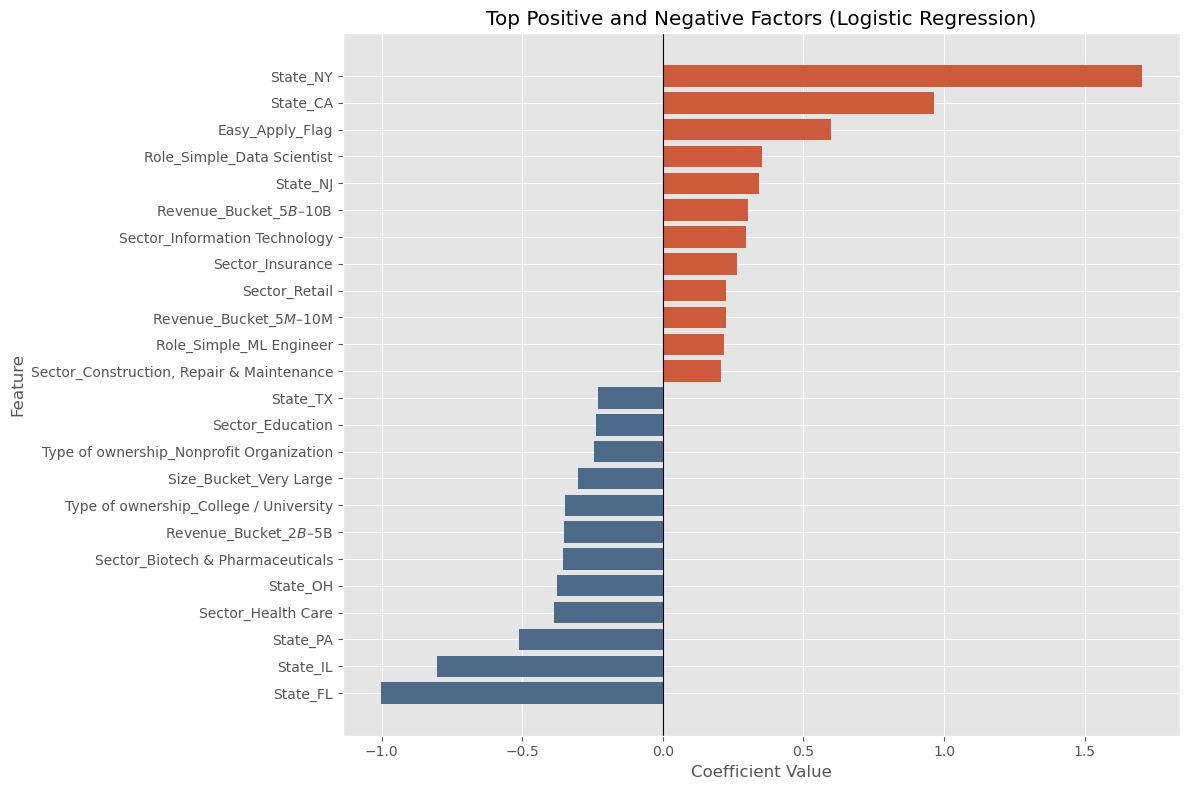

In [52]:
# use the tuned logistic regression pipeline
pipe = best_lr

# get the preprocessing step
prep = pipe.named_steps["prep"]

# get feature names from one-hot encoded categorical columns
cat_encoder = prep.named_transformers_["cat"]
cat_features = cat_encoder.get_feature_names_out(categorical_cols)

# numeric features pass through without change
num_features = numeric_cols.to_numpy()

# combine all feature names
feature_names = np.concatenate([cat_features, num_features])

# extract coefficients from logistic regression
clf = pipe.named_steps["clf"]
coefficients = clf.coef_.ravel()  # binary classification

# create feature importance dataframe
importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values("Coefficient", ascending=False)

# select top positive and top negative features
top_positive = importance.head(12)
top_negative = importance.tail(12)

# combine for plotting
combined = pd.concat([top_positive, top_negative])

# plot feature importance
plt.figure(figsize=(12, 8))

colors = ["#cc5a3b" if c > 0 else "#4c6a8a" for c in combined["Coefficient"]]

plt.barh(combined["Feature"], combined["Coefficient"], color=colors)
plt.axvline(0, color="black", linewidth=0.8)
plt.gca().invert_yaxis()

plt.title("Top Positive and Negative Factors (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()

The feature analysis highlights a clear set of factors that explain why some data-related jobs pay much more than others.

The strongest predictors of higher salary are tied to location, company strength, and technical depth. Jobs based in major tech hubs like New York and California show the largest positive effect on salary. Technical roles — especially Data Scientists and ML Engineers — also push compensation upward. Higher-revenue companies and tech-focused sectors tend to offer stronger pay as well, which aligns with how the industry operates. Even the Easy Apply flag shows a positive influence, suggesting that fast-moving employers are often the ones offering competitive packages.

On the other side, several factors consistently pull salaries down. Lower-paying states such as Florida, Illinois, Pennsylvania, and Ohio show negative effects. Roles in education, healthcare, nonprofits, or university settings also come with lower pay, reflecting the tighter budgets in those sectors. Some very large or traditional organizations show slightly lower salary patterns, likely due to slower compensation growth compared to tech-driven companies.

Overall, the model paints a clear picture:
High salaries come from tech hubs, high-revenue companies, and technically demanding roles.
Lower salaries cluster in non-tech states, low-budget sectors, and slower-moving organizations.

These findings match real-world trends and add a strong analytical layer to the project by explaining not just “what salaries are,” but what drives them.

# 6. Final Conclusions & Recommendations

### 6.1 Key Insights

This analysis reveals a clear picture of how the data science job market behaves. Salaries are shaped by a combination of location, role type, company size, and job application features. High-cost tech hubs such as New York and California consistently offer higher pay, and roles that require deeper technical expertise—like Machine Learning Engineers and Data Scientists—sit at the top of the salary hierarchy.

Company characteristics also matter. Enterprise-level companies tend to pay slightly more than smaller organizations, while industry sectors such as Information Technology, Finance, and Biotech show a stronger pull toward higher salary bands. Interestingly, Easy Apply roles trend higher in pay, likely because companies reserve one-click applications for roles they need filled quickly.

Overall, the salary landscape is shaped by predictable economic forces: geography, skill depth, industry maturity, and competition for talent.

### 6.2 Practical Recommendations

For Job Seekers

1. Target high-value states (NY, CA, NJ) if relocation or remote work is an option.

2. Prioritize technical roles (DS, MLE) if you're aiming for higher salary ceilings.

3. Don’t ignore Easy Apply postings—they often correspond to urgent, well-compensated roles.

4. Look at company size and industry before applying; enterprise IT and biotech firms show stronger compensation trends.

For Companies

1. Benchmark salaries against competitors in NY, CA, and high-paying industries to remain competitive.

2. Use Easy Apply strategically—it attracts more applicants but also correlates with higher salary expectations.

3. Invest in rating and reputation; even though correlation with salary is small, better-rated companies attract stronger talent and demand less salary inflation.

For Workforce & Hiring Strategy

1. New tech companies don’t automatically underpay — age isn’t a strong predictor of salary.

2. Industry matters more than company history, so market positioning should guide compensation planning.

### 6.3 Limitations

1. The dataset relies on Glassdoor-style scraped data, which includes missing values and company-reported salary ranges.

2. Non-U.S. entries and ambiguous locations required filtering, which may remove some valid jobs.

Salary estimates often reflect ranges rather than exact offers.

Some important factors—like skills required, seniority levels, or remote policies—were not included.